### [*Mathematical Modeling of Unsteady Inviscid Flows*](https://www.springer.com/gp/book/9783030183189)
Jeff D. Eldredge (Springer, 2019)


[`PotentialFlow`](https://github.com/darwindarak/PotentialFlow.jl) code written by Darwin Darakananda and Jeff D. Eldredge
<hr />

# Conformal mapping

**This notebook supports Section 4.4 of the book. Here, we will apply conformal mapping in order to generate the flow field about bodies of general shape.**

First, we'll load the PotentialFlow package and make some tools available. If this is the first time you've run a notebook from the book, it might take a few minutes or so to precompile the modules.

In [1]:
using PotentialFlow

┌ Info: Recompiling stale cache file /Users/jeff/.julia/compiled/v1.1/PotentialFlow/79Lvj.ji for PotentialFlow [73af2aaf-3f58-5b29-82a9-435ecf827f5b]
└ @ Base loading.jl:1184


We will also be doing a lot of plotting, using the Plots package, so we load that here

In [17]:
using Plots
pyplot()

┌ Info: Recompiling stale cache file /Users/jeff/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


Plots.PyPlotBackend()

Now, let's generate a body shape. We will do this using the power series family of conformal maps from the unit circle (A.152), and the rigid-body mapping (A.151). These coefficients are specified in descending order of powers of $\zeta$:
`C[1]` corresponds to $c_{1}$, the coefficient of $\zeta^1$; `C[2]` to $c_0$, the coefficient of $\zeta^0$; `C[3]` to $c_{-1}$, the coefficient of $\zeta^{-1}$, etc. The body's reference position is set by `Zᵣ` and the angle (in radians) by `α`.

In [3]:
Zᵣ = complex(0.0)
α = 0.0
C = ComplexF64[1, 0, 0, 0.1, 0.1*exp(im*π/4)]
body = Bodies.ConformalBody(C,Zᵣ,α)

Body generated by: Power series map

  centroid at 0.0 + 0.0im
  angle 0.0


To visualize the conformal mapping of this body, we can plot corresponding grid lines in the circle plane and the physical plane. This is done by plotting the `m` (for *map*) field of the body.

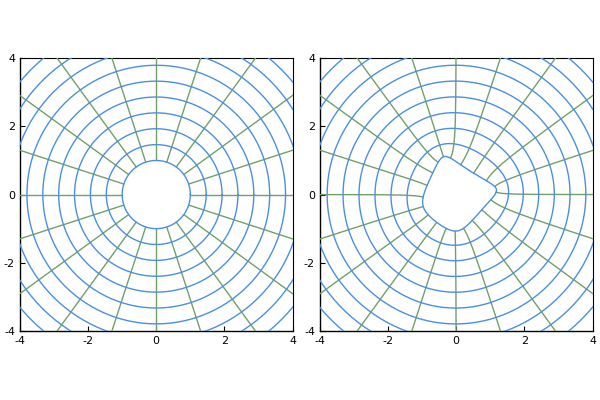

In [21]:
plot(body.m)

In [1]:
#import PotentialFlow.Utils:@get
#@get PotentialFlow (Bodies, Vortex, Source);

Note how the lines are more distorted close to the body. However, the two sets of grid lines remain orthogonal in the physical plane.

In Section 4.4, we showed how to solve the problem (called the Riemann-Hilbert problem) for flows about the unit circle in the presence of general flow contributors, like body motion, vortex elements and uniform flow. These flows are then conformally mapped into the physical plane. Here, we'll see these in action.

Let's inspect the streamline pattern generated by motion of the body. Below, we can set the rigid-body motion parameters. The velocity of the body's reference point (in inertial coordinates) is set by `Żᵣ` and its angular velocity by `Ω`.

In [5]:
Żᵣ = complex(0.0im)
Ω = 1.0
m = Bodies.RigidBodyMotion(Żᵣ,Ω)

Rigid Body Motion:
  ċ = 0.0 + 0.0im
  c̈ = 0.0 + 0.0im
  α̇ = 1.0
  α̈ = 0.0
  Constant (ċ = 0.0 + 0.0im, α̇ = 1.0)

Now plot the streamlines for the selected motion. The motion we specified above was constant, so it's not very important what time we evaluate the flow field at. We'll evaluate it at $t = 0$.

In [8]:
t = 0.0
Bodies.enforce_no_flow_through!(body, m, (), t)

In [9]:
rmax = 3.0   # largest radial coordinate (smallest is 1)
eps = 0.00001 # small offset from the surface of the unit circle

nth = 400   # number of circumferential points
dth = 2π/nth
θ = range(0,2π,length=nth+1)
dr = dth
r = [1+eps]
while maximum(r) < rmax
    push!(r,r[end]+dr)
    dr = r[end]*dth
end

In [23]:
streamlines(r,θ,(body,))

ErrorException: type Array has no field surf

In [22]:
ps = streamlines(r,θ,(body,))
plot!(ps,body,legend=false)

ErrorException: type Array has no field surf

Next, let's add a point vortex and visualize the resulting flow. We specify the position of the vortex in the circle plane, `ζᵥ`. Without loss of generality, the strength of the vortex,  `Γᵥ`,  can be set to $1$ in the absence of other flow contributors.

In [6]:
ζᵥ = 2*exp(im*π/6);
Γᵥ = 1.0;
vort = Vortex.Point(ζᵥ, Γᵥ);

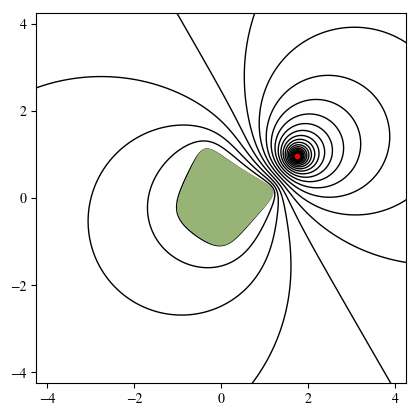

In [7]:
plot_streamlines(body,vort,0.0);

What about a uniform flow? Let's add one here at some angle of incidence. Note that `Winf` is the conjugate velocity of this uniform flow, i.e. $W_\infty = U_\infty - \mathrm{i} V_\infty$.

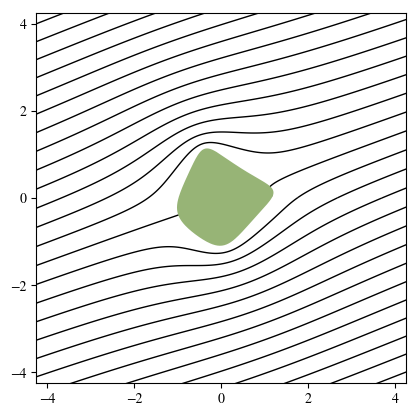

In [8]:
Winf = 1.0*exp(-im*20π/180)
plot_streamlines(body,Winf);

Try playing around with some of the parameters above. We can add a few vortices to the fluid:

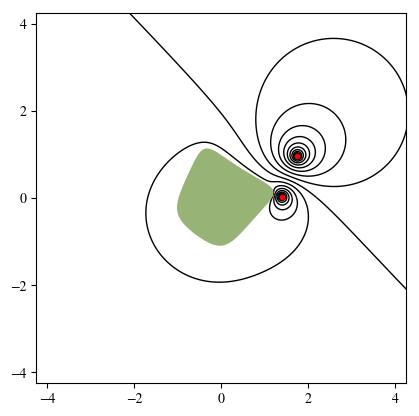

In [9]:
vorts = (Vortex.Point(2*exp(im*π/6), 1.0),Vortex.Point(complex(1.3), -1.0));
plot_streamlines(body,vorts,0.0);

We can also easily generate bodies of other shapes. For example, here's an ellipse of aspect ratio 5.

In [10]:
Zᵣ = complex(0.0)
α = 0.0
a = 0.5; b = 0.1;
C = Complex128[(a+b)/2, 0, (a-b)/2]
body = Bodies.PowerBody(C,Zᵣ,α)

Power series body: C = Complex{Float64}[0.3+0.0im, 0.0+0.0im, 0.2+0.0im], c = 0.0 + 0.0im, α = 0.0ᵒ


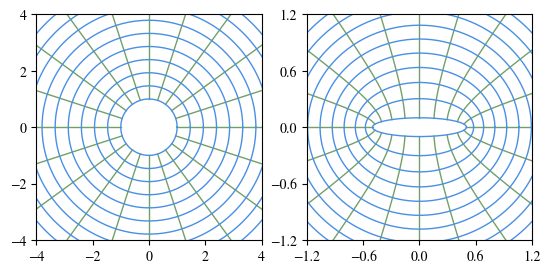

In [11]:
conformal_grid(body)

Here's what the flow looks like when the body is in motion.

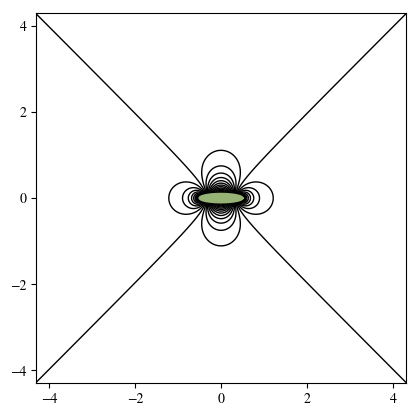

In [12]:
Żᵣ = complex(0.0)
Ω = 1.0
m = Bodies.RigidBodyMotion(Żᵣ,Ω);
t = 0.0;
plot_streamlines(body,m,t);

This work is licensed under a Creative Commons “Attribution-NonCommercial 4.0 International” license.  
(c) 2017 by Jeff D. Eldredge  
All rights reserved.  